## Observations and Insights 

In [264]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
combined_data.head(None)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [428]:
# Checking the number of mice.
checkmice= combined_data['Mouse ID'].value_counts().count()
print(f'Number of Mice: {checkmice}')

Number of Mice: 249


In [418]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


combined_mice = combined_data[combined_data.duplicated(['Mouse ID','Timepoint'])]
combined_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [399]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_mice = combined_data[combined_data['Mouse ID'] == 'g989']
duplicates_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [468]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_data = combined_data.drop_duplicates(subset=(['Mouse ID', 'Timepoint'])).reset_index(drop=True)
mice_data.head(None)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


In [469]:
# Checking the number of mice in the clean DataFrame.
checkmice2 = mice_data['Mouse ID'].value_counts().count()
print(f'Number of Mice: {checkmice2}')

Number of Mice: 249


## Summary Statistics

In [470]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_group = mice_data.groupby(['Drug Regimen'])
tumorvar = "Tumor Volume (mm3)"
drug_mean = drug_group.mean()[tumorvar]
drug_median = drug_group.median()["Tumor Volume (mm3)"]
drug_var = drug_group.var()["Tumor Volume (mm3)"]
drug_std = drug_group.std()["Tumor Volume (mm3)"]
drug_sem = drug_group.sem()["Tumor Volume (mm3)"]

drug_table = pd.DataFrame({
    "Mean": drug_mean,
    "Median": drug_median,
    "Variance": drug_var,
    "Standard Deviation": drug_std,
    "SEM": drug_sem,
})
drug_table



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

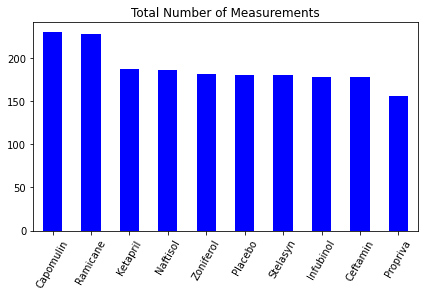

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Name: Drug Regimen, dtype: int64

In [471]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

drugs_bar = mice_data["Drug Regimen"].value_counts()
drug_names = drugs_bar.index.tolist()

drugs_bar.plot(kind="bar", color="b", rot=60)
plt.tight_layout()
plt.title("Total Number of Measurements")
plt.show()
drugs_bar.head()

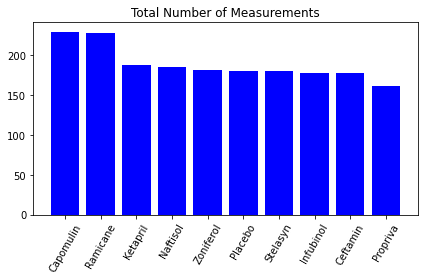

In [472]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#drug_names = 

x_axis = np.arange(len(drug_table))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, drug_count, color="b", align="center")
plt.xticks(tick_locations, drug_names, rotation=60)
plt.title("Total Number of Measurements")
plt.tight_layout()
plt.show()


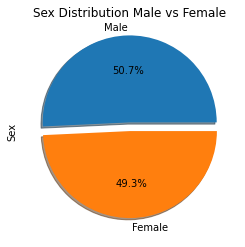

In [473]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
explode = (0.1,0)
mice_sex = mice_data["Sex"].value_counts().plot.pie(autopct="%1.1f%%", shadow=True, explode=explode)
plt.title("Sex Distribution Male vs Female")
labels = ["Male", "Female"]

plt.show()

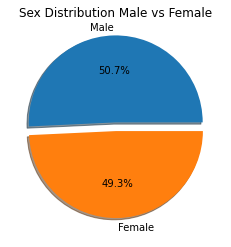

In [474]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mice_sex = mice_data["Sex"].value_counts()


plt.pie(mice_sex, labels=labels, autopct="%1.1f%%", shadow=True,explode=explode)
plt.title("Sex Distribution Male vs Female")
plt.show()

## Quartiles, Outliers and Boxplots

In [487]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
tumor_drugs = mice_data.drop_duplicates(['Mouse ID'], keep='last')
#regi1 = 
#regi2
#regi3
#regi4



#tumor_drugs = tumor_drugs.groupby(['Drug Regimen'])
#print(tumor_drugs)
# Start by getting the last (greatest) timepoint for each mouse
#last_tumor = mice_data.groupby(["Mouse ID"]).max()['Timepoint']

#ramicane = tumor_drugs.loc['Ramicane']
#infubinol = tumor_drugs.loc['Infubinol']
#ceftamin = tumor_drugs.loc['Ceftamin']
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

tumor_drugs.head(50)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
59,s508,Ramicane,Male,1,17,45,30.276232,0
64,f966,Capomulin,Male,16,17,20,30.485985,0
74,m546,Ramicane,Male,18,16,45,30.564625,1
84,z578,Ramicane,Male,11,16,45,30.638696,0
94,j913,Ramicane,Female,4,17,45,31.560470,1


In [476]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = tumor_drugs['Tumor Volume (mm3)'].to_list()
print(treatments)
# Create empty list to fill with tumor vol data (for plotting)
tumor_voldata = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

AttributeError: 'SeriesGroupBy' object has no attribute 'to_list'

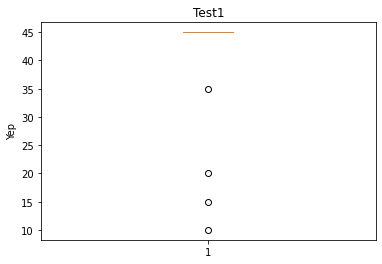

In [313]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Test1')
ax1.set_ylabel('Yep')
ax1.boxplot(capomulin)
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
